In [2]:
import keras.layers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.10.0'

### 데이터 로드
* TF에서 제공하는 데이터셋을 load해 간단한 전처리 진행

In [3]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_data.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [5]:
train_data, valid_data, train_labels, valid_labels = \
    train_test_split(train_data, train_labels, test_size=0.1, shuffle=True)

In [6]:
print(train_data.shape, train_labels.shape)

(54000, 28, 28) (54000,)


In [7]:
print(valid_data.shape, valid_labels.shape)

(6000, 28, 28) (6000,)


In [8]:
print(valid_labels[:30])

[1 9 1 6 2 2 0 6 5 4 8 5 5 9 0 1 5 4 3 9 6 5 8 2 3 9 0 6 2 5]


label = 1


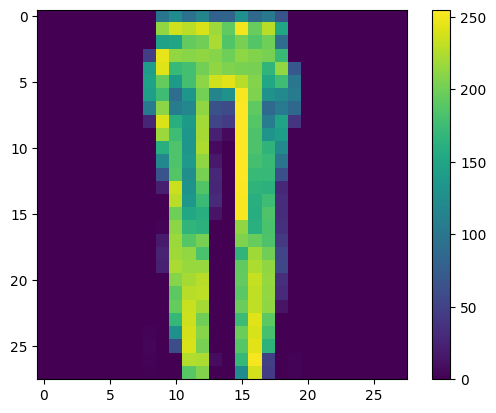

In [9]:
index = 5901
print("label = {}".format(valid_labels[index]))
plt.imshow(valid_data[index].reshape(28, 28))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

In [10]:
train_data = train_data / 255.
train_data = train_data.reshape(-1, 28*28)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 28*28)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

valid_data = valid_data / 255.
valid_data = valid_data.reshape(-1, 28*28)
valid_data = valid_data.astype(np.float32)
valid_labels = valid_labels.astype(np.int32)


print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)
print(valid_data.shape, valid_labels.shape)


(54000, 784) (54000,)
(10000, 784) (10000,)
(6000, 784) (6000,)


### 학습에 사용할 tf.data.Dataset 구성
* 학습에 잘 적용할 수 있도록 label 처리
* 데이터셋 구성

In [11]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=10)
  return image, label

In [12]:
batch_size = 32

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_labels)) # tuple로 묶어서 넣어줘야 함
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label) # 함수호출이 아닌 함수명만 적음
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

# for test
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_data,valid_labels))
valid_dataset = valid_dataset.map(one_hot_label)
valid_dataset = valid_dataset.batch(batch_size=batch_size)
print(valid_dataset)

Metal device set to: Apple M1
<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


2023-12-27 11:40:19.281970: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-27 11:40:19.282637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 모델 구성

In [13]:
# Dense 64 relu
# Dense 32 relu
# Output Layer
# 28 * 28
model = tf.keras.Sequential([
    layers.Dense(64, kernel_initializer=tf.keras.initializers.HeUniform(), kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    # 학습시작이 잘 안될때, kernel_initializer=tf.keras.initializers.HeUniform() 추가 러닝레이트 조절 
    # 학습시작에대한 관여. 초기값을 잘 주는게 중요
    
    layers.Dense(32, kernel_initializer=tf.keras.initializers.HeUniform(), kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    layers.BatchNormalization(),
    
    # 학습이 좀 빨라짐 적은에폭에 빨리올라감
    layers.Activation('relu'),

    layers.Dense(10, kernel_initializer=tf.keras.initializers.HeUniform(), kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('softmax'),

]
)

In [14]:
# F API
input_tensor = layers.Input(shape=(32 * 32 * 3,)) # 1개 데이터의 특성

# hidden layer 구성
x1 = layers.Dense(64, kernel_initializer=tf.keras.initializers.HeUniform(), kernel_regularizer=tf.keras.regularizers.L2(0.0001)),(input_tensor)

x2 = layers.BatchNormalization()(x1)

x3 = layers.Activation('relu')(x2)

x4 = layers.Dense(64, activation='relu')(x3)

x5 = layers.Dense(32, activation='relu')(x4)

output_tensor = layers.Dense(10)(x5)

# 최종 모델 완성
model = tf.keras.Model(input_tensor, output_tensor)

TypeError: Dimension value must be integer or None or have an __index__ method, got value 'TensorShape([None, 3072])' with type '<class 'tensorflow.python.framework.tensor_shape.TensorShape'>'

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.01992756 0.04037228 0.05946248 0.09163518 0.03321703 0.04494628
  0.00825583 0.52680755 0.09483477 0.08054101]]


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 64)                   50240     
                                                                 
 batch_normalization (BatchN  (1, 64)                  256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (1, 64)                   0         
                                                                 
 dense_1 (Dense)             (1, 32)                   2080      
                                                                 
 batch_normalization_1 (Batc  (1, 32)                  128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (1, 32)                   0

### 모델 학습 구성

In [16]:
check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True,
                                           verbose=1)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True,
                                            verbose=1)

In [ ]:
# max_epochs = 100
# # using `tf.data.Dataset`
# history = model.fit(train_dataset, epochs=max_epochs,
#                     steps_per_epoch=len(train_data) // batch_size,
#                     validation_data=valid_dataset,
#                     validation_steps=len(valid_data) // batch_size,
#                     callbacks=[check_point_cb, early_stopping_cb]
#                    )
max_epochs = 100
# using `tf.data.Dataset`
history = model.fit(train_dataset,
                    epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size,
                    validation_data=valid_dataset,
                    validation_steps=len(valid_data) // batch_size,
                    callbacks=[check_point_cb, early_stopping_cb]
                    )

Epoch 1/100


2023-12-26 18:30:15.423728: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/keras/backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-12-26 18:30:15.727040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1686/1687 [============================>.] - ETA: 0s - loss: 1.0320 - accuracy: 0.7233

2023-12-26 18:30:47.639113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.69640, saving model to fashion_mnist_model.h5
1687/1687 [==============================] - 34s 19ms/step - loss: 1.0317 - accuracy: 0.7234 - val_loss: 0.6964 - val_accuracy: 0.8165
Epoch 2/100
1686/1687 [============================>.] - ETA: 0s - loss: 0.7448 - accuracy: 0.8096
Epoch 2: val_loss improved from 0.69640 to 0.59150, saving model to fashion_mnist_model.h5
1687/1687 [==============================] - 32s 19ms/step - loss: 0.7447 - accuracy: 0.8096 - val_loss: 0.5915 - val_accuracy: 0.8374
Epoch 3/100
1686/1687 [============================>.] - ETA: 0s - loss: 0.6580 - accuracy: 0.8257
Epoch 3: val_loss improved from 0.59150 to 0.52402, saving model to fashion_mnist_model.h5
1687/1687 [==============================] - 32s 19ms/step - loss: 0.6580 - accuracy: 0.8258 - val_loss: 0.5240 - val_accuracy: 0.8559
Epoch 4/100
1686/1687 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.8350
Epoch 4: val_loss improved f

In [ ]:
# 코드 수정
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valid Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Valid Loss')
plt.show()

In [ ]:
results = model.evaluate(test_dataset)